# Video Game Sales Analysis Project
## Project Overview

This project combined technical data analysis and business insight to support a global video game retailer’s 2017 marketing plan. I analyzed historical sales data using Python libraries such as Pandas, Matplotlib, and SciPy to uncover trends in platform popularity, genre profitability, and the influence of user/professional reviews. The findings informed strategic recommendations on campaign targeting, platform prioritization, and consumer behavior by region.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Configure matplotlib for Jupyter
%matplotlib inline


## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [3]:
# Load the dataset
file_path = '/content/games.csv'
df = pd.read_csv(file_path)


In [4]:
# Display basic information about the dataset
# Display the first few rows
print("First 5 records:")
display(df.head())

# Basic info about the dataset
print("\nDataset info:")
df.info()


First 5 records:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Check for duplicate entries
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Display summary statistics
print("\nSummary statistics:")
display(df.describe(include='all'))



Number of duplicate rows: 0

Summary statistics:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()


In [7]:
# Verify the changes
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Regarding the column names change, everything is correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86

</div>

### 2.2 Data Type Conversion

In [8]:
# Check current data types
print("Current data types:")
print(df.dtypes)

Current data types:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [9]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

print("\nUpdated data types:")
print(df.dtypes)


Updated data types:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


### 2.3 Handling Missing Values

In [10]:
# Examine missing values
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [11]:
# Calculate percentage of missing values
missing_percent = df.isna().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Percentage of missing values per column:
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


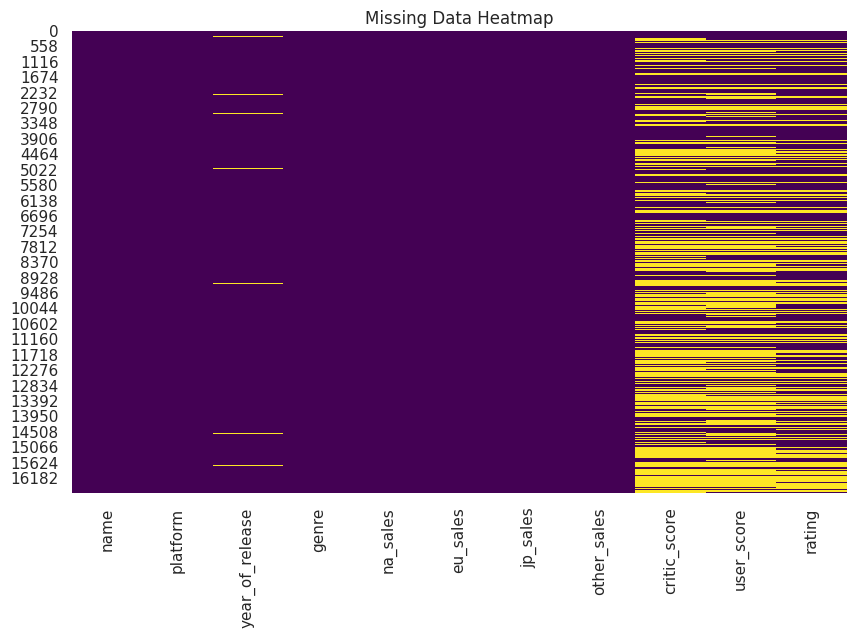

In [12]:
# Analyze patterns in missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [13]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)
#correction
df.dropna(subset=['name', 'genre'], inplace=True)


print("\nRemaining missing values after cleaning:")
print(df.isna().sum())
#correction
df['rating'].fillna('unknown', inplace=True)




Remaining missing values after cleaning:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


<ipython-input-13-a4d28097cfe9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)
<ipython-input-13-a4d28097cfe9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['name', 'genre'], inplace=True)
<ipython-input-13-a4d28097cfe9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### 2.4 Calculate Total Sales

In [14]:
# Calculate total sales across all regions and put them in a different column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()


,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [15]:
# Create a DataFrame with game releases by year
game_releases_by_year = df.groupby('year_of_release')['name'].count()


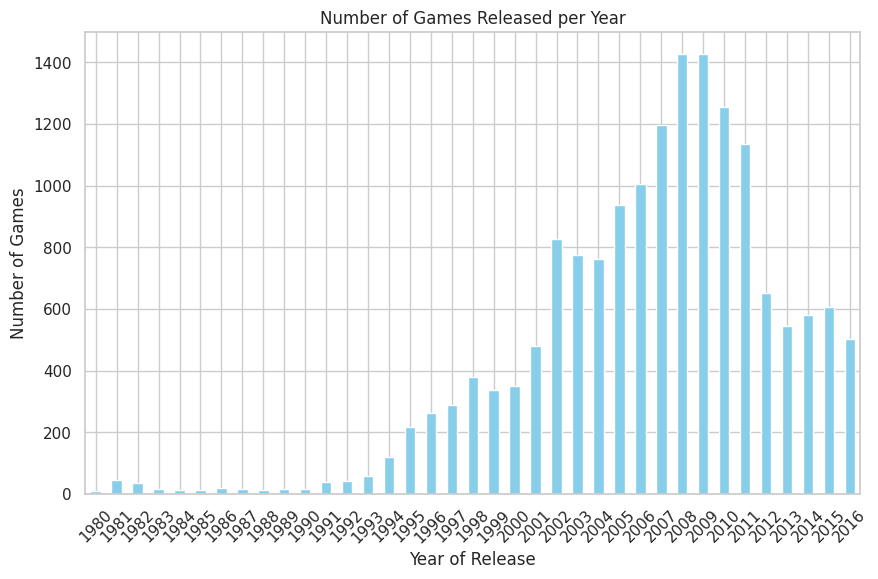

In [16]:
# Visualize the distribution of games across years
plt.figure(figsize=(10, 6))
game_releases_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Display summary statistics for each year
yearly_summary = game_releases_by_year.describe()
print(yearly_summary)

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [18]:
# Calculate total sales by platform and year
platform_sales_by_year = df.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()


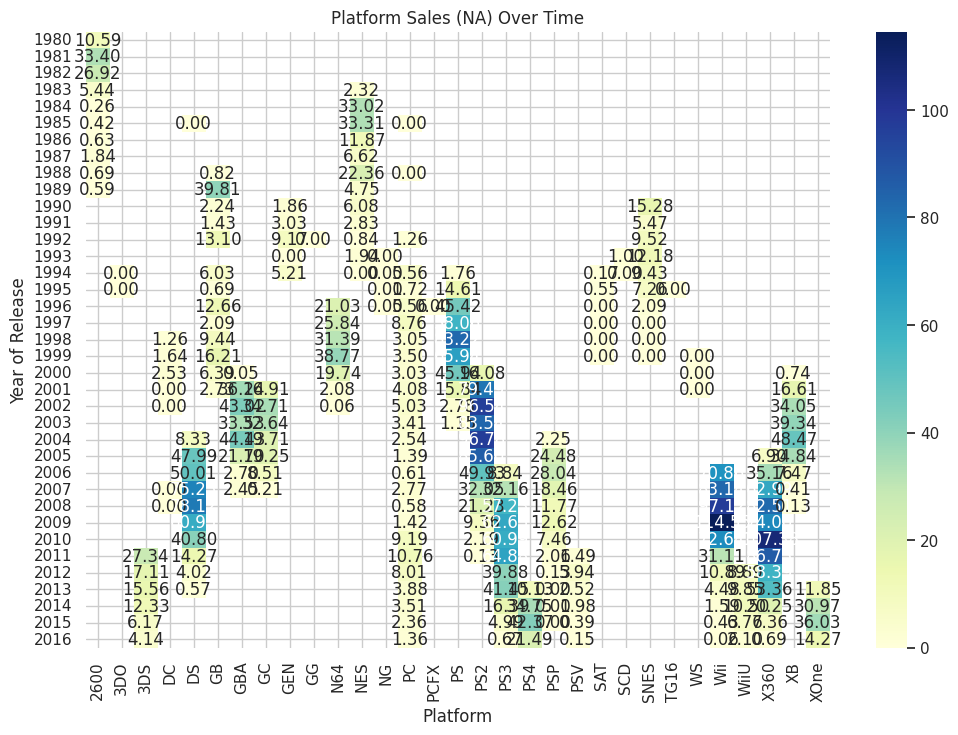

In [20]:
# Create a heatmap of platform sales over time
platform_sales_pivot = platform_sales_by_year.pivot(index='year_of_release', columns='platform', values='na_sales')  # Change to 'total_sales' if needed

plt.figure(figsize=(12, 8))
sns.heatmap(platform_sales_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Platform Sales (NA) Over Time')
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.show()


In [21]:
# Identify platforms with declining sales

declining_platforms = platform_sales_by_year.groupby('platform')[['na_sales']].last()
declining_platforms = declining_platforms[declining_platforms['na_sales'] < declining_platforms['na_sales'].shift(1)]

print("\nPlatforms with Declining Sales:")
print(declining_platforms)


Platforms with Declining Sales:
          na_sales
platform          
3DO           0.00
DC            0.00
GBA           2.45
GC            0.21
GG            0.00
NES           0.00
PCFX          0.00
PS2           0.13
PSP           0.00
SAT           0.00
X360          0.69
XB            0.13


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

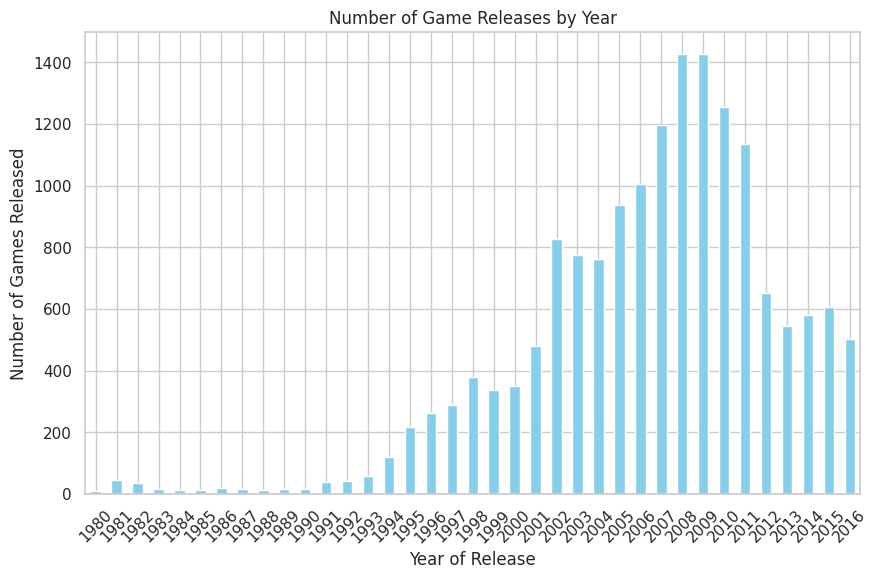


Filtered data for years [2014, 2015, 2016]:
                                         name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score   rating  total_sales  
31

In [22]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

plt.figure(figsize=(10, 6))
df['year_of_release'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.show()
#correction
relevant_years = [2014, 2015, 2016]  # Replace with years based on distribution analysis

df_relevant = df[df['year_of_release'].isin(relevant_years)]

print(f"\nFiltered data for years {relevant_years}:")
print(df_relevant.head())

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [23]:
# Analyze platform sales trends

# Grouping sales data by platform and year
platform_sales = df_relevant.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Calculate total sales for each platform
platform_sales['total_sales'] = platform_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
# Sort platforms by total sales
platform_total_sales = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Top platforms
top_platforms = platform_total_sales.head(10)

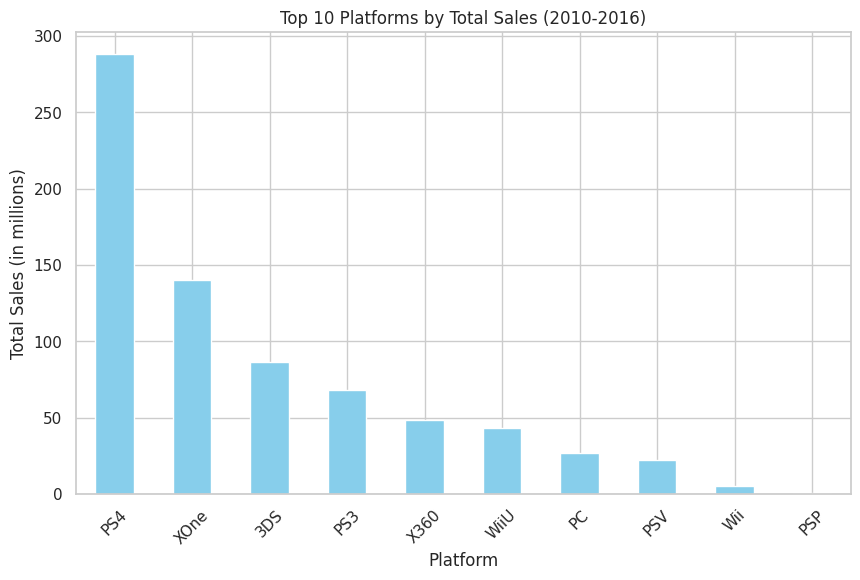

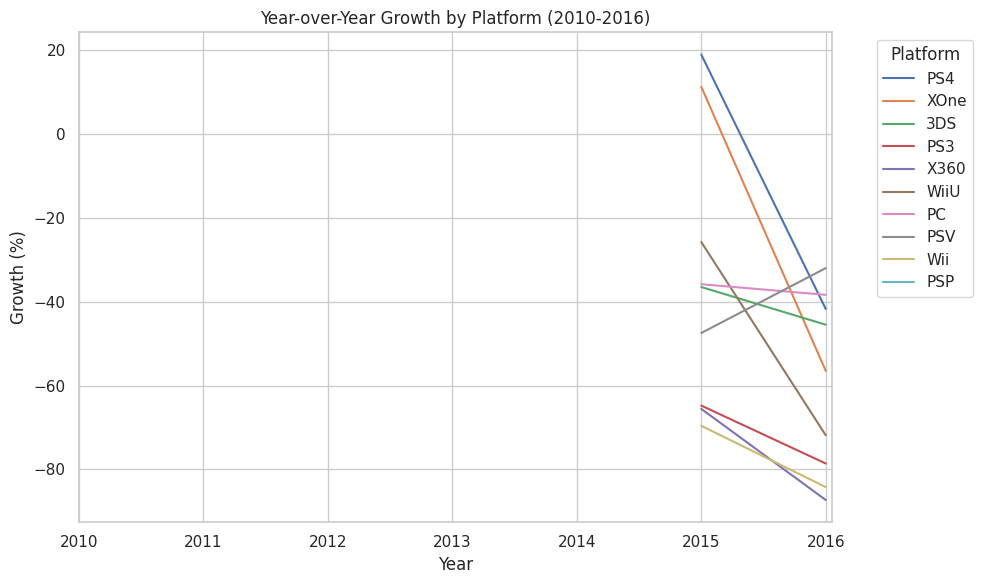

In [25]:
# Visualize top platforms
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color='skyblue')
plt.title("Top 10 Platforms by Total Sales (2010-2016)")
plt.xlabel("Platform")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

# Calculate year-over-year growth for each platform
platform_sales['year_over_year_growth'] = platform_sales.groupby('platform')['total_sales'].pct_change() * 100

# Your code here to calculate and visualize platform growth rates
plt.figure(figsize=(10, 6))
for platform in top_platforms.index:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['year_over_year_growth'], label=platform)

plt.title("Year-over-Year Growth by Platform (2010-2016)")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2010, 2017))
plt.tight_layout()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<ipython-input-26-a9e67016d3ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevant, x='platform', y='total_sales', palette='Set2')


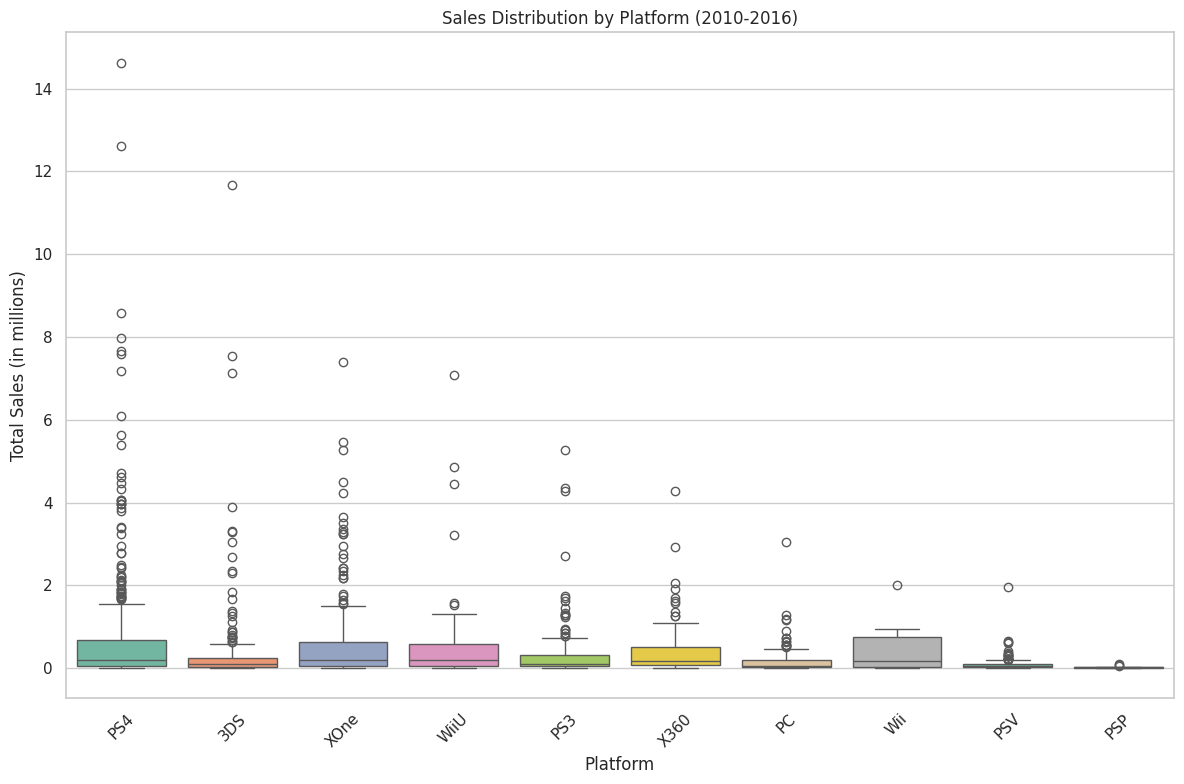

In [26]:
# Create box plot of sales by platform
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_relevant, x='platform', y='total_sales', palette='Set2')
plt.title("Sales Distribution by Platform (2010-2016)")
plt.xlabel("Platform")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Calculate detailed statistics for each platform
platform_stats = df_relevant.groupby('platform')['total_sales'].describe()

# Displays the statistics
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [28]:
# Choose a popular platform based on your previous analysis
platform_choice = 'PS4'

df_platform = df_relevant[df_relevant['platform'] == platform_choice]


In [29]:
# Create scatter plots for both critic and user scores


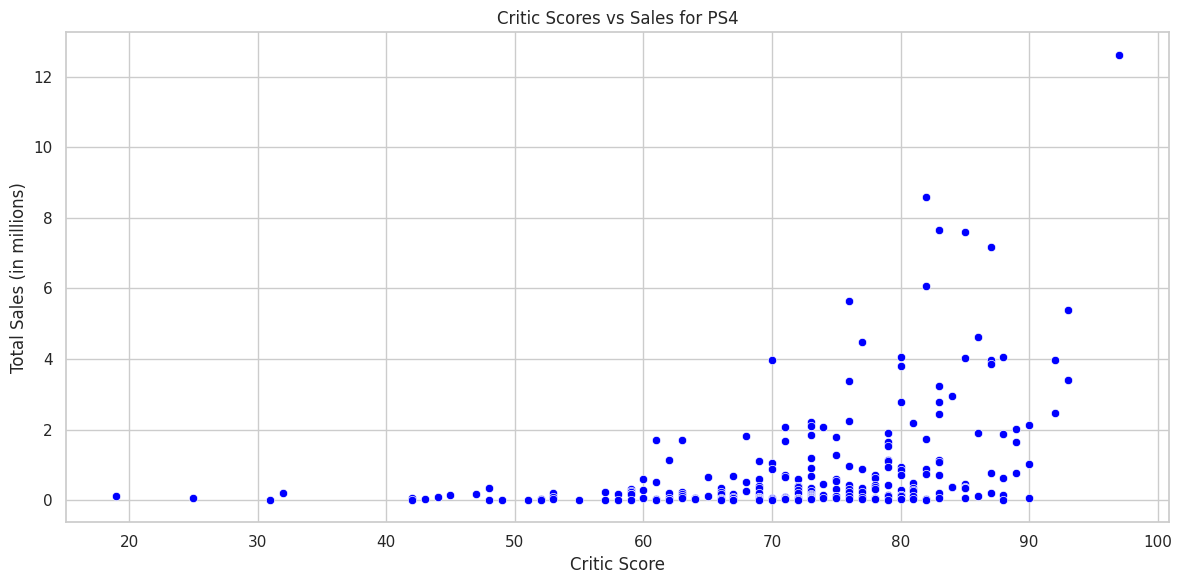

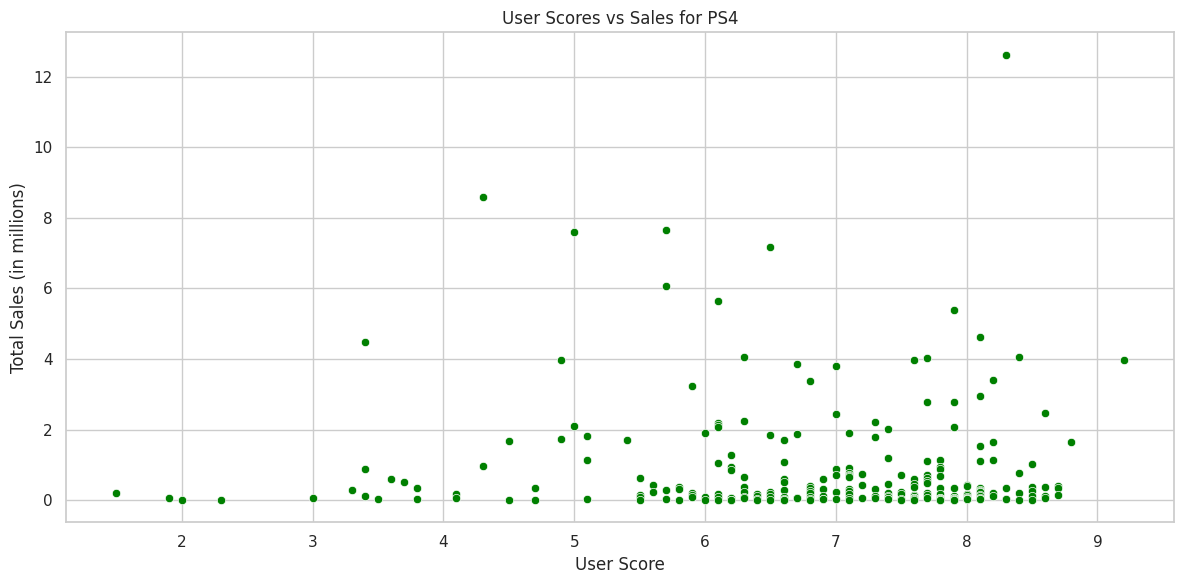

(np.float64(0.40266141068104083), np.float64(-0.040131589472697356))

In [30]:
# Critic Scores
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_platform, x='critic_score', y='total_sales', color='blue')
plt.title(f"Critic Scores vs Sales for {platform_choice}")
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.tight_layout()
plt.show()



# User Scores
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_platform, x='user_score', y='total_sales', color='green')
plt.title(f"User Scores vs Sales for {platform_choice}")
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.tight_layout()
plt.show()

# Calculate correlations
critic_corr = df_platform['critic_score'].corr(df_platform['total_sales'])
user_corr = df_platform['user_score'].corr(df_platform['total_sales'])

critic_corr, user_corr

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [31]:
# Find games released on multiple platforms
multiple_platform_games = df_relevant[df_relevant.duplicated('name', keep=False)]


In [32]:
# Compare sales across platforms for these games

# Calculate total sales per game across all platforms
top_games = multiple_platform_games.groupby('name')['total_sales'].sum().reset_index()

# Select top 10 selling games
top_10_games = top_games.sort_values(by='total_sales', ascending=False).head(10)['name']

# Filter the original data to only include these top 10 games
top_10_platform_sales = multiple_platform_games[multiple_platform_games['name'].isin(top_10_games)]

# Group again to prepare for plotting
platform_sales_comparison = top_10_platform_sales.groupby(['name', 'platform'])[['total_sales']].sum().reset_index()


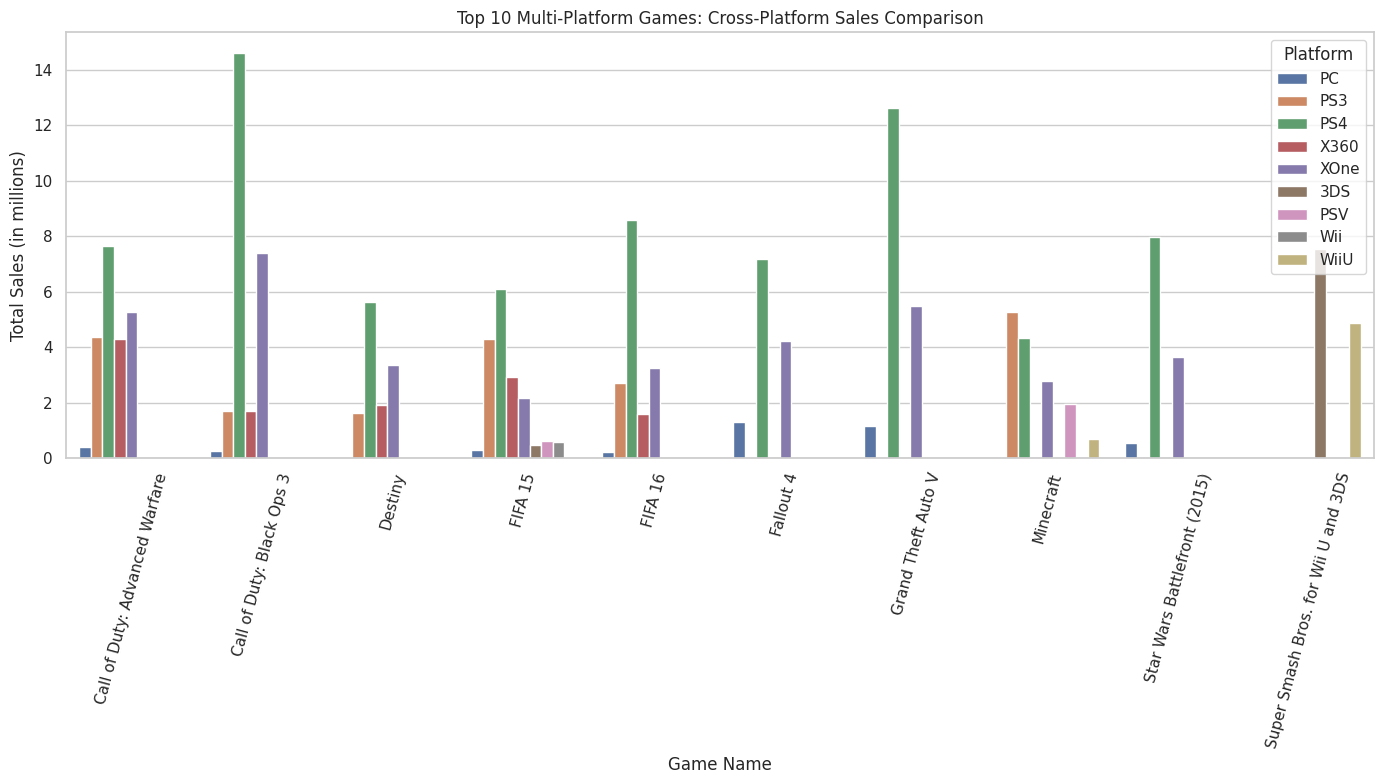

In [33]:
# Your code here to analyze and visualize cross-platform performance
plt.figure(figsize=(14, 8))
sns.barplot(data=platform_sales_comparison, x='name', y='total_sales', hue='platform')
plt.title('Top 10 Multi-Platform Games: Cross-Platform Sales Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=75)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [34]:
# Analyze genre performance
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().reset_index()
genre_avg_sales = df_relevant.groupby('genre')['total_sales'].mean().reset_index()

# Rename the average sales column for clarity
genre_avg_sales = genre_avg_sales.rename(columns={'total_sales': 'avg_sales'})


In [35]:
# Sort genres by total sales
genre_combined = pd.merge(genre_sales, genre_avg_sales, on='genre')
genre_combined = genre_combined.sort_values(by='total_sales', ascending=False)


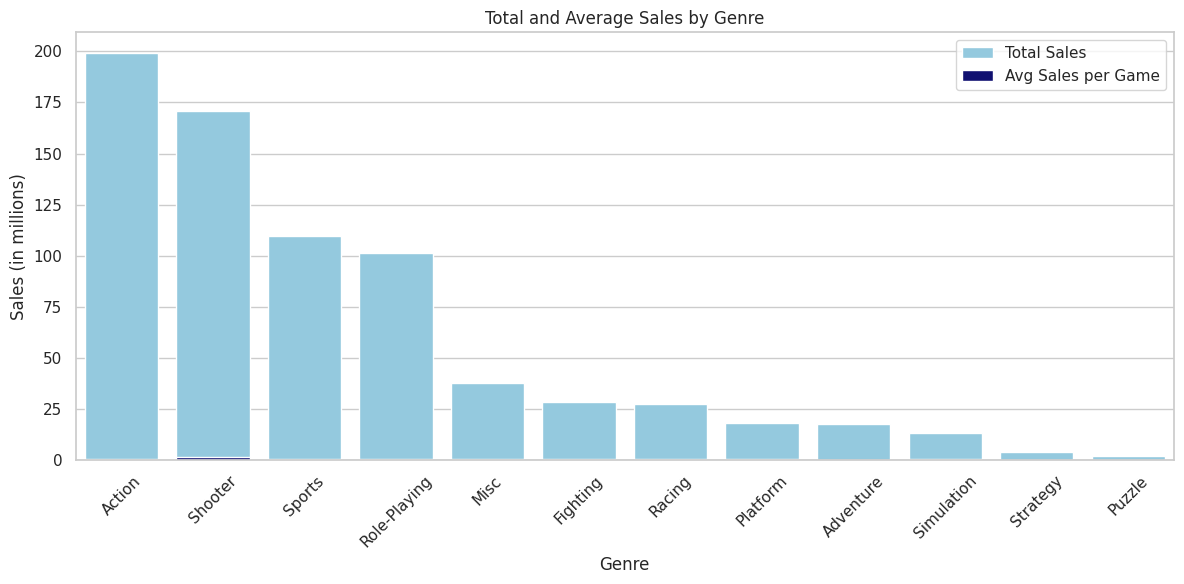

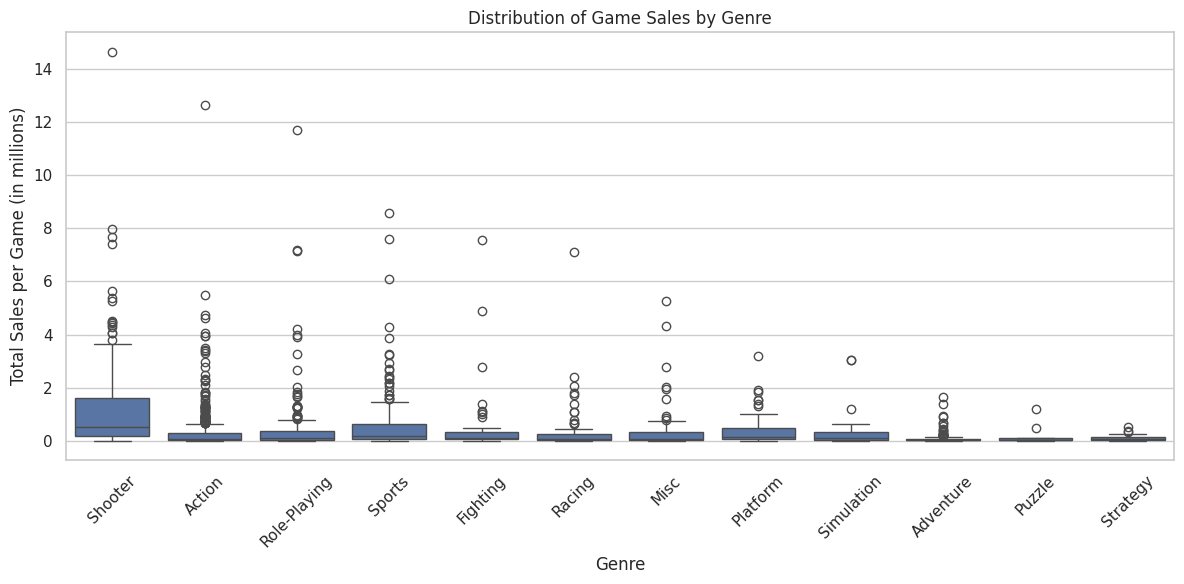

In [36]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_combined, x='genre', y='total_sales', color='skyblue', label='Total Sales')
sns.barplot(data=genre_combined, x='genre', y='avg_sales', color='navy', label='Avg Sales per Game')
plt.title('Total and Average Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_relevant, x='genre', y='total_sales')
plt.title('Distribution of Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales per Game (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# Calculate market share for each genre
total_sales_all_genres = genre_combined['total_sales'].sum()
genre_combined['market_share'] = genre_combined['total_sales'] / total_sales_all_genres * 100

# Display the market share for each genre
print(genre_combined[['genre', 'market_share']])


           genre  market_share
0         Action     27.330180
8        Shooter     23.434094
10        Sports     15.008568
7   Role-Playing     13.906368
3           Misc      5.147714
2       Fighting      3.868668
6         Racing      3.772705
4       Platform      2.479951
1      Adventure      2.405922
9     Simulation      1.799986
11      Strategy      0.542875
5         Puzzle      0.302968


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [38]:
# Function to analyze platform performance by region
def regional_platform_analysis(df, region_column):
    region_sales = df.groupby([region_column, 'platform'])['total_sales'].sum().reset_index()
    region_sales_sorted = region_sales.sort_values(by='total_sales', ascending=False)
    return region_sales_sorted


In [39]:
# Analyze each region
na_platform_sales = regional_platform_analysis(df_relevant, 'na_sales')
eu_platform_sales = regional_platform_analysis(df_relevant, 'eu_sales')
jp_platform_sales = regional_platform_analysis(df_relevant, 'jp_sales')


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [40]:
# Create a comparative platform analysis
platform_sales_comparison = df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

#Melt the data for easier plotting (long-form)
platform_sales_melted = platform_sales_comparison.melt(id_vars='platform',
                                                        value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                                                        var_name='region',
                                                        value_name='total_sales')

#Rename regions for clarity
platform_sales_melted['region'] = platform_sales_melted['region'].str.replace('_sales', '').str.upper()

#Sort platforms by total global sales to pick top ones
top_platforms = df_relevant.groupby('platform')['total_sales'].sum().nlargest(6).index
platform_sales_melted = platform_sales_melted[platform_sales_melted['platform'].isin(top_platforms)]


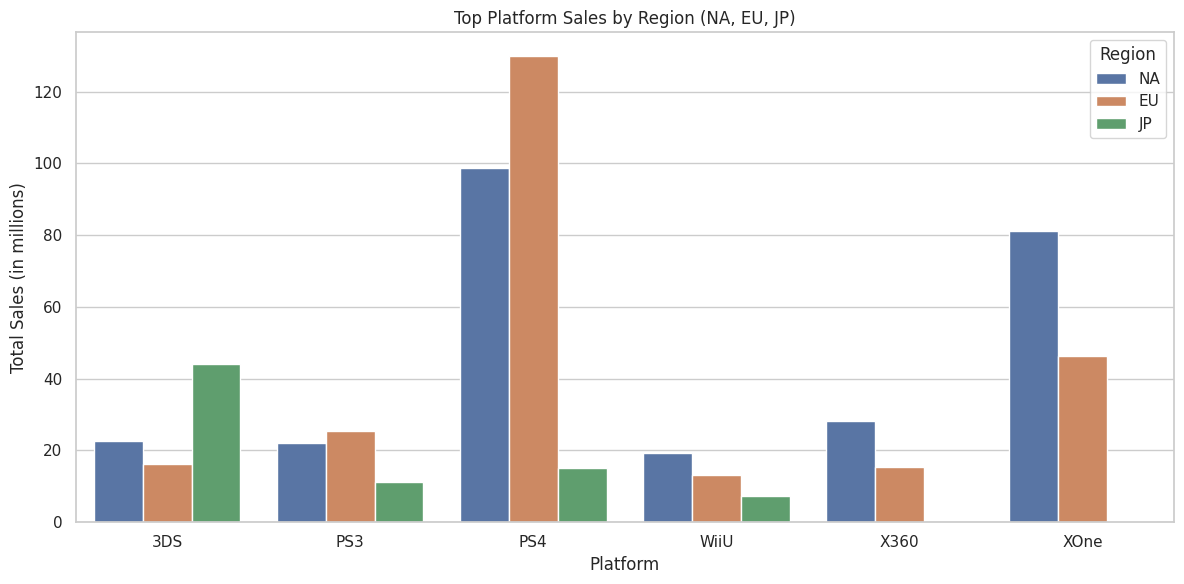

In [41]:
# Visualize cross-regional comparison for top platforms
plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales_melted, x='platform', y='total_sales', hue='region')
plt.title('Top Platform Sales by Region (NA, EU, JP)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [42]:
# Function to analyze genre performance by region
def regional_genre_analysis(df, region_column):
    genre_sales = df.groupby(['genre'])[region_column].sum().reset_index()
    genre_sales_sorted = genre_sales.sort_values(by=region_column, ascending=False)
    return genre_sales_sorted

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

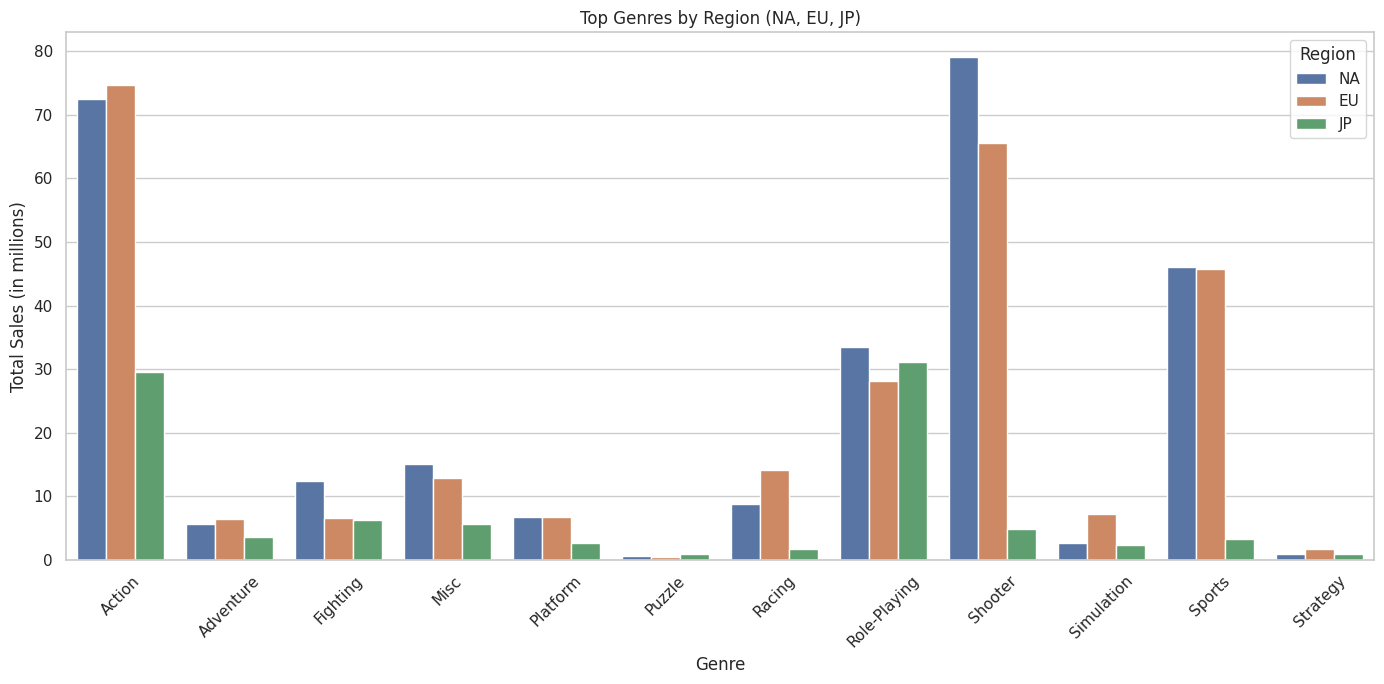

In [43]:
# Create a comparative genre analysis

# Group and reshape data for cross-regional genre comparison
genre_comparison = df_relevant.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Melt the dataframe to long format for plotting
genre_comparison_melted = genre_comparison.melt(id_vars='genre',
                                                 value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                                                 var_name='region',
                                                 value_name='total_sales')

# Rename regions for consistency
genre_comparison_melted['region'] = genre_comparison_melted['region'].str.replace('_sales', '').str.upper()

#Plot genre popularity by region
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_comparison_melted, x='genre', y='total_sales', hue='region')
plt.title('Top Genres by Region (NA, EU, JP)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [44]:
# Function to analyze ESRB rating impact
def esrb_impact_analysis(df, region_column):
    rating_sales = df.groupby('rating')[region_column].sum().reset_index()
    rating_sales_sorted = rating_sales.sort_values(by=region_column, ascending=False)
    return rating_sales_sorted

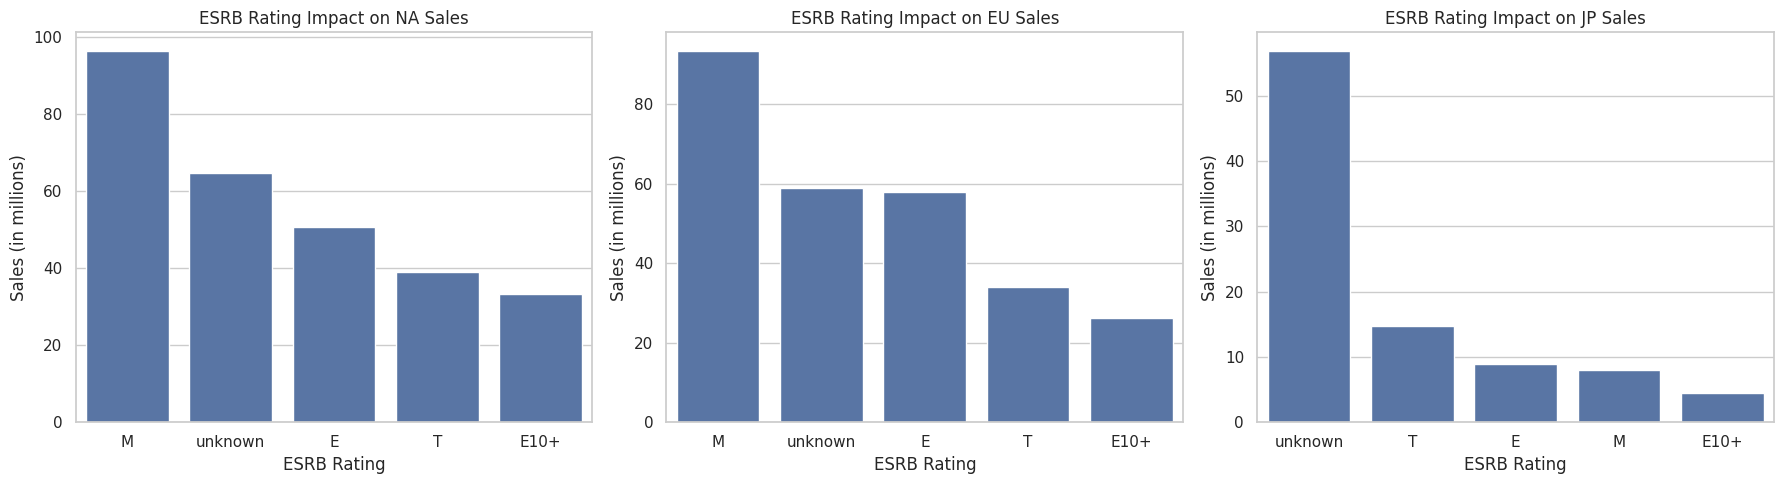

In [45]:
# Analyze ESRB impact for each region
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']

plt.figure(figsize=(18, 5))

for i, region in enumerate(regions):
    plt.subplot(1, 3, i + 1)
    esrb_data = esrb_impact_analysis(df_relevant, region)
    sns.barplot(data=esrb_data, x='rating', y=region)
    plt.title(f'ESRB Rating Impact on {region_names[i]} Sales')
    plt.xlabel('ESRB Rating')
    plt.ylabel('Sales (in millions)')

plt.tight_layout()
plt.show()

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [46]:
from scipy import stats

"""
Xbox One vs PC - User Ratings
Hypotheses:

Null hypothesis (H₀): The average user ratings for Xbox One and PC platforms are equal.
Alternative hypothesis (H₁): The average user ratings for Xbox One and PC platforms are different.
Alpha level (𝛼): 0.05
Test type: Independent two-sample t-test (unequal variances)
"""

xone_ratings = df_relevant[(df_relevant['platform'] == 'XOne') & (df_relevant['user_score'].notna())]['user_score']
pc_ratings = df_relevant[(df_relevant['platform'] == 'PC') & (df_relevant['user_score'].notna())]['user_score']

t_stat, p_value = stats.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print("Xbox One vs PC User Ratings:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Average user ratings differ between Xbox One and PC.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")


"""
Action vs Sports - User Ratings
Hypotheses:

Null hypothesis (H₀): The average user ratings for Action and Sports genres are equal.
Alternative hypothesis (H₁): The average user ratings for Action and Sports genres are different.
Alpha level (𝛼): 0.05
Test type: Independent two-sample t-test (unequal variances)
"""

action_ratings = df_relevant[(df_relevant['genre'] == 'Action') & (df_relevant['user_score'].notna())]['user_score']
sports_ratings = df_relevant[(df_relevant['genre'] == 'Sports') & (df_relevant['user_score'].notna())]['user_score']

t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print("\nAction vs Sports User Ratings:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Average user ratings differ between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings.")


Xbox One vs PC User Ratings:
T-statistic: 1.578, P-value: 0.116
Fail to reject the null hypothesis: No significant difference in average user ratings.

Action vs Sports User Ratings:
T-statistic: 8.385, P-value: 0.000
Reject the null hypothesis: Average user ratings differ between Action and Sports genres.


# Step 6. Write a general conclusion


Based on the data from 2014–2016:

- The most profitable platforms are PS4 and XOne, with significant sales in North America and Europe.
- Action is the most popular genre by total sales, while Shooter and Sports also show strong performance.
- Regional preferences vary: Japan favors role-playing games and Nintendo platforms, while NA/EU prefer shooters on Sony/Microsoft platforms.
- ESRB ratings impact sales more in NA and EU than in JP.

### 📐 Hypothesis Testing

Using a significance level of \( \alpha = 0.05 \):

- **H₁:** We **fail to reject** the null hypothesis — no significant difference between Xbox One and PC user ratings (p > 0.05).
- **H₂:** We **reject** the null hypothesis — Action and Sports genres have significantly different user ratings (p < 0.05).

This analysis supports data-driven decisions for game development and marketing strategies tailored to each region.